# Librerie

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error
import tensorflow as tf
from tensorflow import keras 
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam
from scipy.stats import norm
import scipy.optimize as opt

2025-03-28 14:57:34.020967: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Caricamento Dati

In [4]:
options_3 = pd.read_csv('2013-01/2013-01-03options.csv')
options_4 = pd.read_csv('2013-01/2013-01-04options.csv')

stocks_3 = pd.read_csv('2013-01/2013-01-03stocks.csv')
stocks_4 = pd.read_csv('2013-01/2013-01-04stocks.csv')

display(options_4)
display(stocks_4)

,contract,underlying,expiration,type,strike,style,bid,bid_size,ask,ask_size,volume,open_interest,quote_date,delta,gamma,theta,vega,implied_volatility
0,A130119C00018000,A,2013-01-19,call,18.0,A,23.35,NaN,26.40,NaN,0,0,2013-01-04,1.0000,0.0000,-0.0545,0.0000,0.2540
1,A130119P00018000,A,2013-01-19,put,18.0,A,0.00,NaN,0.02,NaN,0,215,2013-01-04,0.0000,0.0000,0.0000,0.0000,0.3212
2,A130119C00019000,A,2013-01-19,call,19.0,A,22.35,NaN,25.45,NaN,0,0,2013-01-04,1.0000,0.0000,-0.0575,0.0000,0.2540
3,A130119P00019000,A,2013-01-19,put,19.0,A,0.00,NaN,0.02,NaN,0,4,2013-01-04,0.0000,0.0000,0.0000,0.0000,0.3212
4,A130119C00020000,A,2013-01-19,call,20.0,A,21.15,NaN,24.40,NaN,0,5,2013-01-04,1.0000,0.0000,-0.0606,0.0000,0.2540
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
513708,ZX130622P00002500,ZX,2013-06-22,put,2.5,A,0.10,NaN,0.50,NaN,0,0,2013-01-04,-0.2520,0.2137,-0.5283,0.6657,0.7076
513709,ZX130622C00005000,ZX,2013-06-22,call,5.0,A,0.00,NaN,0.25,NaN,0,0,2013-01-04,0.1948,0.1946,-0.4041,0.5754,0.6713
513710,ZX130622P00005000,ZX,2013-06-22,put,5.0,A,1.85,NaN,2.30,NaN,0,0,2013-01-04,-0.7846,0.1950,-0.4906,0.5900,0.6870
513711,ZX130622C00007500,ZX,2013-06-22,call,7.5,A,0.00,NaN,0.25,NaN,0,0,2013-01-04,0.1527,0.1143,-0.5119,0.4930,0.9794


,symbol,open,high,low,close,volume,adjust_close
0,A,42.139999,42.949999,41.860001,42.860000,6432800,NaN
1,AA,9.109990,9.279990,9.099990,9.259991,6115100,NaN
2,AACC,4.800000,4.805000,4.630000,4.720000,22400,NaN
3,AAMRQ,0.840000,0.880000,0.830000,0.870000,2680100,NaN
4,AAN,28.820000,29.290001,28.719999,29.110001,251500,NaN
...,...,...,...,...,...,...,...
3801,WCBO,22.790000,22.980000,22.770000,22.890000,92100,NaN
3802,XAL,47.490000,47.490000,47.490000,47.490000,0,NaN
3803,XRM,3.270000,3.650000,3.250000,3.600000,56300,NaN
3804,YRCW,6.780000,6.920000,6.650000,6.670000,83900,NaN


In [5]:
spx_option_3 = options_3[options_3['underlying']=='SPX']
spx_option_4 = options_4[options_4['underlying']=='SPX']

spx_option_3 = spx_option_3[spx_option_3['type']=='call']
spx_option_4 = spx_option_4[spx_option_4['type']=='call']

spx_option_3 = spx_option_3[spx_option_3['style']=='E']
spx_option_4 = spx_option_4[spx_option_4['style']=='E']

spx_option_3 = spx_option_3[['underlying','expiration', 'strike','bid','ask','quote_date','implied_volatility']]
spx_option_4 = spx_option_4[['underlying','expiration', 'strike','bid','ask','quote_date','implied_volatility']]


spx_option_3['expiration'] = pd.to_datetime(spx_option_3['expiration'])
spx_option_3['quote_date'] = pd.to_datetime(spx_option_3['quote_date'])
spx_option_4['expiration'] = pd.to_datetime(spx_option_4['expiration'])
spx_option_4['quote_date'] = pd.to_datetime(spx_option_4['quote_date'])

spx_option_3['ttm'] = ((spx_option_3['expiration'] - spx_option_3['quote_date']).dt.days / 365.25).round(3)
spx_option_4['ttm'] = ((spx_option_4['expiration'] - spx_option_4['quote_date']).dt.days / 365.25).round(3)

spx_option_3['price'] = (spx_option_3['bid']+spx_option_3['ask'])/2
spx_option_4['price'] = (spx_option_4['bid']+spx_option_4['ask'])/2

spx_option_3 = spx_option_3[spx_option_3['price']>1]
spx_option_4 = spx_option_4[spx_option_4['price']>1]

spx_option_3.rename(columns={'underlying': 'symbol'}, inplace=True)
spx_option_4.rename(columns={'underlying': 'symbol'}, inplace=True)

spx_stocks_3 = stocks_3[stocks_3['symbol']=='SPX']
spx_stocks_4 = stocks_4[stocks_4['symbol']=='SPX']

spx_option_3 = spx_option_3.merge(
    spx_stocks_3[['symbol','close']],  # Seleziona solo le colonne necessarie
    left_on=['symbol'],        # Colonne del dataset delle opzioni
    right_on=['symbol'],             # Colonne del dataset del sottostante
    how='left'  # Mantieni tutte le opzioni e unisci solo i prezzi disponibili
)
spx_option_4 = spx_option_4.merge(
    spx_stocks_4[['symbol','close']],  # Seleziona solo le colonne necessarie
    left_on=['symbol'],        # Colonne del dataset delle opzioni
    right_on=['symbol'],             # Colonne del dataset del sottostante
    how='left'  # Mantieni tutte le opzioni e unisci solo i prezzi disponibili
)


spx_option_3.rename(columns={'close': 's0'}, inplace=True)
spx_option_3['price_s'] = spx_option_3['price']/spx_option_3['s0']
spx_option_4.rename(columns={'close': 's0'}, inplace=True)
spx_option_4['price_s'] = spx_option_4['price']/spx_option_4['s0']

display(spx_option_3)
display(spx_option_4)

,symbol,expiration,strike,bid,ask,quote_date,implied_volatility,ttm,price,s0,price_s
0,SPX,2013-01-04,1100.0,357.30,359.5,2013-01-03,0.3154,0.003,358.400,1459.369995,0.245585
1,SPX,2013-01-04,1125.0,332.30,334.5,2013-01-03,0.3154,0.003,333.400,1459.369995,0.228455
2,SPX,2013-01-04,1150.0,307.30,309.5,2013-01-03,0.3154,0.003,308.400,1459.369995,0.211324
3,SPX,2013-01-04,1175.0,282.30,284.5,2013-01-03,0.3154,0.003,283.400,1459.369995,0.194193
4,SPX,2013-01-04,1180.0,277.30,279.5,2013-01-03,0.3154,0.003,278.400,1459.369995,0.190767
...,...,...,...,...,...,...,...,...,...,...,...
837,SPX,2015-12-19,2100.0,10.50,12.6,2013-01-03,0.1368,2.957,11.550,1459.369995,0.007914
838,SPX,2015-12-19,2200.0,6.50,7.6,2013-01-03,0.1351,2.957,7.050,1459.369995,0.004831
839,SPX,2015-12-19,2250.0,5.20,6.1,2013-01-03,0.1354,2.957,5.650,1459.369995,0.003872
840,SPX,2015-12-19,2500.0,2.50,2.6,2013-01-03,0.1429,2.957,2.550,1459.369995,0.001747


,symbol,expiration,strike,bid,ask,quote_date,implied_volatility,ttm,price,s0,price_s
0,SPX,2013-01-04,1100.0,364.60,367.60,2013-01-04,0.3000,0.000,366.100,1466.469971,0.249647
1,SPX,2013-01-04,1125.0,339.60,342.60,2013-01-04,0.3000,0.000,341.100,1466.469971,0.232599
2,SPX,2013-01-04,1150.0,314.60,317.60,2013-01-04,0.3000,0.000,316.100,1466.469971,0.215552
3,SPX,2013-01-04,1175.0,289.60,292.60,2013-01-04,0.3000,0.000,291.100,1466.469971,0.198504
4,SPX,2013-01-04,1180.0,284.60,287.60,2013-01-04,0.3000,0.000,286.100,1466.469971,0.195094
...,...,...,...,...,...,...,...,...,...,...,...
841,SPX,2015-12-19,2100.0,10.50,13.40,2013-01-04,0.1361,2.954,11.950,1466.469971,0.008149
842,SPX,2015-12-19,2200.0,6.30,8.60,2013-01-04,0.1351,2.954,7.450,1466.469971,0.005080
843,SPX,2015-12-19,2250.0,4.90,6.60,2013-01-04,0.1345,2.954,5.750,1466.469971,0.003921
844,SPX,2015-12-19,2500.0,2.60,2.85,2013-01-04,0.1431,2.954,2.725,1466.469971,0.001858


In [6]:
spx_option = pd.concat([spx_option_3, spx_option_4], ignore_index=True)
spx_option

,symbol,expiration,strike,bid,ask,quote_date,implied_volatility,ttm,price,s0,price_s
0,SPX,2013-01-04,1100.0,357.30,359.50,2013-01-03,0.3154,0.003,358.400,1459.369995,0.245585
1,SPX,2013-01-04,1125.0,332.30,334.50,2013-01-03,0.3154,0.003,333.400,1459.369995,0.228455
2,SPX,2013-01-04,1150.0,307.30,309.50,2013-01-03,0.3154,0.003,308.400,1459.369995,0.211324
3,SPX,2013-01-04,1175.0,282.30,284.50,2013-01-03,0.3154,0.003,283.400,1459.369995,0.194193
4,SPX,2013-01-04,1180.0,277.30,279.50,2013-01-03,0.3154,0.003,278.400,1459.369995,0.190767
...,...,...,...,...,...,...,...,...,...,...,...
1683,SPX,2015-12-19,2100.0,10.50,13.40,2013-01-04,0.1361,2.954,11.950,1466.469971,0.008149
1684,SPX,2015-12-19,2200.0,6.30,8.60,2013-01-04,0.1351,2.954,7.450,1466.469971,0.005080
1685,SPX,2015-12-19,2250.0,4.90,6.60,2013-01-04,0.1345,2.954,5.750,1466.469971,0.003921
1686,SPX,2015-12-19,2500.0,2.60,2.85,2013-01-04,0.1431,2.954,2.725,1466.469971,0.001858


In [7]:
threshold = 0.2  # Escludi opzioni in cui la differenza tra strike e sottostante è maggiore del 20%

# Filtra le opzioni call troppo ITM o OTM
spx_option = spx_option[~((spx_option['s0'] > spx_option['strike'] * (1 + threshold)) |  # Troppo ITM
                              (spx_option['s0'] < spx_option['strike'] * (1 - threshold)))]  # Troppo OTM

# Mostra il risultato
display(spx_option)

,symbol,expiration,strike,bid,ask,quote_date,implied_volatility,ttm,price,s0,price_s
8,SPX,2013-01-04,1220.0,237.3,239.5,2013-01-03,0.3154,0.003,238.40,1459.369995,0.163358
9,SPX,2013-01-04,1225.0,232.3,234.5,2013-01-03,0.3154,0.003,233.40,1459.369995,0.159932
10,SPX,2013-01-04,1230.0,227.3,229.5,2013-01-03,0.3154,0.003,228.40,1459.369995,0.156506
11,SPX,2013-01-04,1235.0,222.3,224.5,2013-01-03,0.3154,0.003,223.40,1459.369995,0.153080
12,SPX,2013-01-04,1240.0,217.3,219.5,2013-01-03,0.3154,0.003,218.40,1459.369995,0.149654
...,...,...,...,...,...,...,...,...,...,...,...
1676,SPX,2015-12-19,1650.0,84.1,90.6,2013-01-04,0.1494,2.954,87.35,1466.469971,0.059565
1677,SPX,2015-12-19,1675.0,76.3,82.9,2013-01-04,0.1482,2.954,79.60,1466.469971,0.054280
1678,SPX,2015-12-19,1700.0,69.0,75.9,2013-01-04,0.1471,2.954,72.45,1466.469971,0.049404
1679,SPX,2015-12-19,1725.0,62.1,69.3,2013-01-04,0.1462,2.954,65.70,1466.469971,0.044801


# Black and Scholes

In [8]:
def bls(S, K, Vol, r, TTM):
    d1 = (np.log(S/K) + (r + 0.5*Vol**2)*TTM)/(np.sqrt(TTM)*Vol) 
    d2 = d1 - Vol*np.sqrt(TTM)
    C = S*norm.cdf(d1) - K*norm.cdf(d2)*np.exp(-r*TTM) 
    return C

In [9]:
price_bls_iv = bls(spx_option['s0'],
                                spx_option['strike'],
                                spx_option['implied_volatility'],
                                0.004,
                                spx_option['ttm'])

error = 100*mean_absolute_percentage_error(spx_option['price'], price_bls_iv)
error

1.7322073561927904

In [10]:
def diff_bls(Vol):
    return sum((spx_option['price'] - bls(spx_option['s0'],
                                          spx_option['strike'],
                                          Vol,
                                          0.004,
                                          spx_option['ttm']))**2) 

In [11]:
best_vol = opt.minimize(diff_bls, x0=0.3, bounds=[(0.01, 1)], method="L-BFGS-B")
best_vol.x[0]

0.1397966268782698

In [12]:
price_bls_cal = bls(spx_option['s0'],
                                spx_option['strike'],
                                best_vol.x[0],
                                0.004,
                                spx_option['ttm'])
error = 100*mean_absolute_percentage_error(spx_option['price'], price_bls_cal)
error

25.30224400717494

In [13]:
spx_option_0194 = spx_option[spx_option['ttm']==0.194]

def diff_bls(Vol):
    return sum((spx_option_0194['price'] - bls(spx_option_0194['s0'],
                                               spx_option_0194['strike'],
                                               Vol,
                                               0.004,
                                               spx_option_0194['ttm']))**2)

best_vol = opt.minimize(diff_bls, x0=0.07, bounds=[(0.01, 1)], method="L-BFGS-B")
best_vol.x[0]

0.12194850388653938

In [14]:
price_0194_cal = bls(spx_option_0194['s0'],
                     spx_option_0194['strike'],
                     best_vol.x[0],
                     0.004,
                     spx_option_0194['ttm'])

error = 100*mean_absolute_percentage_error(spx_option_0194['price'], price_0194_cal)
error

12.699749962899162

# Neural Network

In [15]:
X = spx_option[['price_s','strike','ttm','price','s0']]
y = spx_option['implied_volatility']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.90, random_state = 42, shuffle=True)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.drop(['price','s0'], axis=1))
X_test_scaled = scaler.transform(X_test.drop(['price','s0'], axis=1))

# Stampa delle dimensioni dei dataset
print("Dimensione X_train:", X_train_scaled.shape)
print("Dimensione y_train:", y_train.shape)
print("Dimensione X_test:", X_test_scaled.shape)
print("Dimensione y_test:", y_test.shape)


Dimensione X_train: (1230, 3)
Dimensione y_train: (1230,)
Dimensione X_test: (137, 3)
Dimensione y_test: (137,)


Epoch 1/100
77/77 [==============================] - 2s 6ms/step - loss: 0.2634 - mae: 0.2634 - val_loss: 0.1402 - val_mae: 0.1402
Epoch 2/100
77/77 [==============================] - 0s 5ms/step - loss: 0.1097 - mae: 0.1097 - val_loss: 0.0469 - val_mae: 0.0469
Epoch 3/100
77/77 [==============================] - 0s 4ms/step - loss: 0.0906 - mae: 0.0906 - val_loss: 0.0420 - val_mae: 0.0420
Epoch 4/100
77/77 [==============================] - 0s 5ms/step - loss: 0.0905 - mae: 0.0905 - val_loss: 0.0361 - val_mae: 0.0361
Epoch 5/100
77/77 [==============================] - 0s 4ms/step - loss: 0.0824 - mae: 0.0824 - val_loss: 0.0401 - val_mae: 0.0401
Epoch 6/100
77/77 [==============================] - 0s 5ms/step - loss: 0.0832 - mae: 0.0832 - val_loss: 0.0330 - val_mae: 0.0330
Epoch 7/100
77/77 [==============================] - 0s 4ms/step - loss: 0.0761 - mae: 0.0761 - val_loss: 0.0325 - val_mae: 0.0325
Epoch 8/100
77/77 [==============================] - 0s 4ms/step - loss: 0.0720 - m

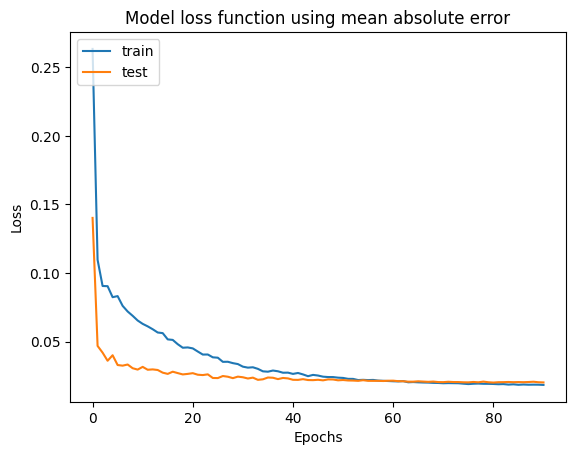

In [28]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

model_mae = keras.models.Sequential()
model_mae.add(keras.layers.Dense(41, input_dim=X_train_scaled.shape[1], activation='relu'))
model_mae.add(keras.layers.Dense(64, activation='relu'))
model_mae.add(keras.layers.Dropout(0.2))  # Regularization
model_mae.add(keras.layers.Dense(1, activation='linear'))

model_mae.compile(optimizer=Adam(learning_rate=0.0001), loss='mae', metrics=['mae'])

# Callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)

# Training
history_mae = model_mae.fit(X_train_scaled, y_train, epochs=100, batch_size=16,
                            validation_data=(X_test_scaled, y_test), verbose=1,
                            callbacks=[early_stop])

# Plot
fig = plt.figure()
plt.plot(history_mae.history['loss'])
plt.plot(history_mae.history['val_loss'])
plt.title('Model loss function using mean absolute error')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [29]:
y_pred = model_mae.predict(X_test_scaled)
y_pred = y_pred.ravel()

#calcoliamo l'errore
mae = mean_absolute_error(y_test, y_pred)
mape = 100*mean_absolute_percentage_error(y_test, y_pred)

print('mae', mae)
print('mape', mape)

5/5 [==============================] - 0s 3ms/step
mae 0.020217436439190467
mape 8.97656595954048


In [30]:
bls_price_nn = bls(X_test['s0'],
                   X_test['strike'],
                   y_pred,
                   0.004,
                   X_test['ttm'])

error = 100*(abs(X_test['price'] - bls_price_nn)/X_test['price'])
error.mean()

3.1872399943624177

# Bates Model

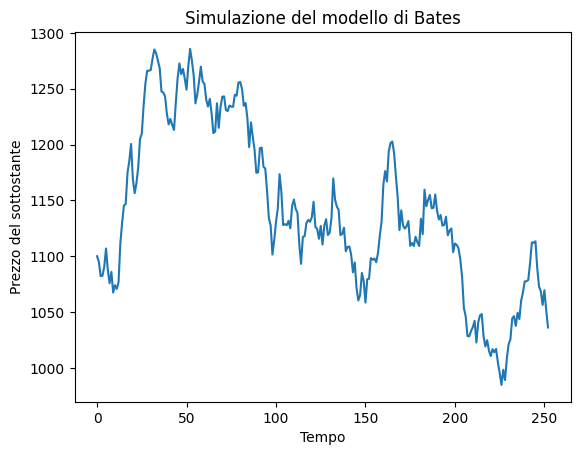

In [59]:
def simulate_bates(S0, V0, r, kappa, theta, sigma, rho, lambda_J, mu_J, sigma_J, T, N):
    dt = T / N
    S = np.zeros(N+1)
    V = np.zeros(N+1)
    S[0] = S0
    V[0] = V0
    
    # Generazione di numeri casuali in un solo passaggio
    Z = np.random.randn(N, 2)  # Due Browniani indipendenti
    W_V = Z[:, 0]
    W_S = rho * Z[:, 0] + np.sqrt(1 - rho**2) * Z[:, 1]  # Moto browniano correlato
    
    for t in range(1, N+1):
        # Processo di volatilità stocastica di Heston
        V[t] = np.maximum(V[t-1] + kappa * (theta - V[t-1]) * dt + sigma * np.sqrt(V[t-1]) * np.sqrt(dt) * W_V[t-1], 0)

        # Processo di Poisson per i salti
        N_J = np.random.poisson(lambda_J * dt)
        J = np.sum(np.random.normal(mu_J, sigma_J, N_J)) if N_J > 0 else 0
        
        # Dinamica del sottostante
        S[t] = S[t-1] * np.exp((r - 0.5 * V[t-1]) * dt + np.sqrt(V[t-1]) * np.sqrt(dt) * W_S[t-1] + J)
    
    return S

S0 = 1100      # Prezzo iniziale
V0 = 0.04     # Volatilità iniziale
r = 0.004      # Tasso risk-free
kappa = 1   # Velocità di ritorno alla media
theta = 0.04  # Media della varianza
sigma = 0.02   # Volatilità della volatilità
rho = -0.5    # Correlazione tra asset e volatilità
lambda_J = 0.002 # Intensità dei salti
mu_J = -0.01  # Media dei salti
sigma_J = 0.9 # Deviazione standard dei salti
T = 1         # Scadenza di 1 anno
N = 252       # Passaggi temporali

# Simulazione
S_sim = simulate_bates(S0, V0, r, kappa, theta, sigma, rho, lambda_J, mu_J, sigma_J, T, N)

# Grafico
plt.plot(S_sim)
plt.xlabel("Tempo")
plt.ylabel("Prezzo del sottostante")
plt.title("Simulazione del modello di Bates")
plt.show()

In [35]:
def bates_call_price(S0, V0, r, kappa, theta, sigma, rho, lambda_J, mu_J, sigma_J, T, K, N, M):
    # Generiamo M simulazioni in parallelo
    ST = np.array([simulate_bates(S0, V0, r, kappa, theta, sigma, rho, lambda_J, mu_J, sigma_J, T, N)[-1] for _ in range(M)])
    
    # Calcoliamo il payoff vettorizzato
    payoffs = np.maximum(ST - K, 0)
    
    # Scontiamo la media dei payoffs
    return np.exp(-r * T) * np.mean(payoffs)

In [62]:
kappa = 2.0   # Velocità di ritorno alla media
theta = 0.04  # Media della varianza
sigma = 0.2   # Volatilità della volatilità
rho = -0.5    # Correlazione tra asset e volatilità
lambda_J = 0.1 # Intensità dei salti
mu_J = -0.02  # Media dei salti
sigma_J = 0.1 # Deviazione standard dei salti
N = 252       # Passaggi temporali
M = 10000     # simulazioni MC

price_bates = []
for row in spx_option.tail(20).itertuples(index=False):
    strike = row.strike
    ttm = row.ttm
    s0 = row.s0

    price_bates.append(bates_call_price(s0,V0,0.004,kappa,theta,sigma,rho,lambda_J,
                                        mu_J,sigma_J,ttm,strike,N,M))

100*mean_absolute_percentage_error(spx_option['price'].head(20), price_bates)

15.782975703595397

In [64]:
100*mean_absolute_percentage_error(spx_option['price'].tail(20), price_bates)

36.46401140255542